# Проект 2: Итоговое задание

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не аботает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике


Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import random

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

## Первичный анализ/обработка данных

### Какие типы данных у столбцов

In [1647]:
display(stud.head(10))
pd.DataFrame(stud.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

""


Итого всего в датасете 30 столбцов, из них 13 числовых и 17 строковых.

### Переименование столбцов

Переименуем столбцы в нижний регистр для удобства:

In [1648]:
for column in stud.columns:
    stud.rename({column: column.lower()},
               axis = "columns", inplace = True)
    
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Уберём из имён столцов лишнее: "studytime, granular" -> "studytime_granular":

In [1649]:
for column in stud.columns:
    new_name = "".join(column.split()).replace(',', '_')
    stud.rename({column: new_name},
               axis = "columns", inplace = True)

Посмотрим на результат:

In [1650]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## Анализируем столбцы

Подсчитаем, сколько пропусков в каждом из столбцов:

In [1651]:
null_data = stud.isnull().sum()
null_data[null_data > 0]

address               17
famsize               27
pstatus               45
medu                   3
fedu                  24
mjob                  19
fjob                  36
reason                17
guardian              31
traveltime            28
studytime              7
failures              22
schoolsup              9
famsup                39
paid                  40
activities            14
nursery               16
studytime_granular     7
higher                20
internet              34
romantic              31
famrel                27
freetime              11
goout                  8
health                15
absences              12
score                  6
dtype: int64

Если попробуем удалить все пропуски по всем столбцам, то получим:

In [1652]:
#здесь поработаем с копией датасета
stud_copy0 = stud.copy()

stud_copy0.dropna(axis=0, inplace=True)
stud_copy0.info()

print(f'Количество записей (строк, индексов) в оригинальном датасете:', stud.shape[0])
print(f'Количество записей было бы в модифицированном датасете:', stud_copy0.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              97 non-null     object 
 1   sex                 97 non-null     object 
 2   age                 97 non-null     int64  
 3   address             97 non-null     object 
 4   famsize             97 non-null     object 
 5   pstatus             97 non-null     object 
 6   medu                97 non-null     float64
 7   fedu                97 non-null     float64
 8   mjob                97 non-null     object 
 9   fjob                97 non-null     object 
 10  reason              97 non-null     object 
 11  guardian            97 non-null     object 
 12  traveltime          97 non-null     float64
 13  studytime           97 non-null     float64
 14  failures            97 non-null     float64
 15  schoolsup           97 non-null     object 
 16  famsup   

Осталось бы всего 97 из изначальных 395! Будем осторожны с удалением строк с пустыми данными!

Согласно общей рекомендации выбрасывать столбцы, где пропусков больше 40% от данных в столбце, проверим наличие таких столбцов:

In [1653]:
col_for_drop = [col for col in stud.columns if stud[col].isna().sum() > stud[col].shape[0]*0.4]
print(col_for_drop)

[]


Таких столбцов нет. Вот и хорошо!

### score

Важнейший количественный столбец для анализа, предсказываемая величина в будущей модели. Примем, что пропуски здесь неприемлимы и не могут быть заменены чем-либо. 389 непустых значений из общего количества 395. Выкинем строки с пропусками (их здесь всего-лишь 6):

In [1654]:
#Здесь и далее присваиваем переменной col название активной колонки/столбца
col = 'score'

stud.dropna(axis=0,subset=[col],inplace=True)
stud.reset_index(inplace=True, drop=True)

Посмотрим общую информацию, дескриптивную статистику и гистограмму.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

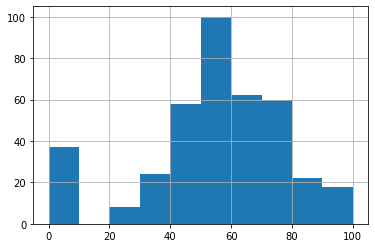

In [1655]:
stud.loc[:, [col]].info()
stud[col].hist()
stud[col].describe()

Кажется, аномалия: есть значения score, равные 0.0, т.е. с нулевым рейтингом. Таких около 10%. Либо эти ученики очень плохи в предмете, либо это ошибка при сборе данных. Склоняюсь к первому варианту.

Удалим нулевые значения и посмотрим на гистограмму ещё раз.

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

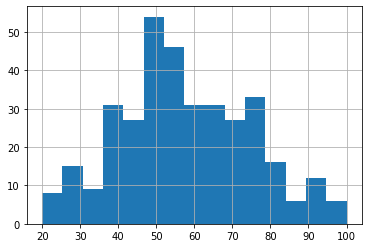

In [1656]:
# Замена нулевых ("0.0") значений на None для последующего удаления строк с None через pd.dropna()
def drop_zeroes(x):
    if x == 0.0:    
        return None
    return x

stud_copy = stud.copy()

col = 'score'

stud_copy[col] = stud[col].apply(drop_zeroes)
stud_copy.dropna(axis=0,subset=[col],inplace=True)

stud_copy[col].hist(bins=15)
stud_copy[col].describe()

Если выкинуть пропуски, то распределение рейтинга визуально более похоже на гауссовское. Аномалий не видно. Оставим нулевые значения (0.0), не стоит исключать нулевые результаты, например, из-за неявки на экзамен.

Посмотрим что будет, если отфильтровать выбросы в оригинальном датасете по формуле межквартильного размаха.

<AxesSubplot:>

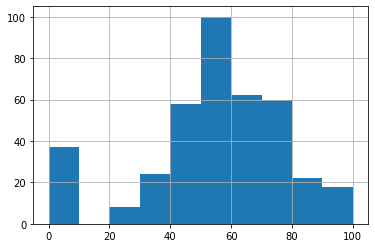

In [1657]:
descr = stud[col].describe()
IQR = descr['75%'] - descr['25%']
stud[col].loc[stud[col].between(descr['25%'] - 1.5 * IQR, descr['75%'] + 1.5 * IQR)].hist()

Результат: идентичная оригинальной гистограмма, нулевые значения не являются выбросами.

Посмотрим на рейтинг score в зависимости от номера индекса:

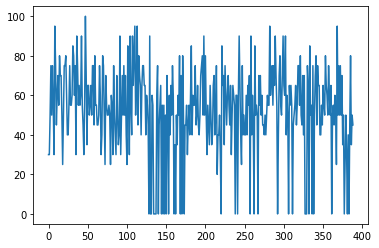

In [1658]:
col = 'score'

plt.plot(stud[col])

Та самая аномалия: нулевые значения учащены вокруг индекса 150. Плохой класс?

### studytime_granular

В описании, полученной к задаче, не раскрывается содержание столбца. Подозрительно, у нас уже есть столбец с похожим названием studytime. Пока подождём с удалением, посмотрим позже, какие он будет давать корреляции с studytime. Тогда и решим, удалять его или нет:

In [1659]:
col = 'studytime_granular'

print(f'Уникальных значений в столбце', col, ':', stud[col].nunique())

Уникальных значений в столбце studytime_granular : 4


In [1660]:
print(f'Пропусков в столбце', col, ':', stud[col].isnull().sum())

Пропусков в столбце studytime_granular : 7


Пропущенные значения трогать (заполнять, удалять...) пока не будем. 

### school

In [1661]:
pd.DataFrame(stud.school.value_counts())

,school
GP,344
MS,45


Категориальный, точнее бинарный столбец, две школы в датасете. Пока оставляем. Вдруг преподают лучше в одной из школ?

### sex

In [1662]:
df_sex = pd.DataFrame(stud.sex.value_counts())
display(df_sex)

,sex
F,204
M,185


In [1663]:
print(f'Девочек на ~', round(((df_sex['sex'][0] - df_sex['sex'][1])/ df_sex['sex'].sum()) * 100, 1), '% больше, чем мальчиков.')
print(f'Девочек ~', round(df_sex['sex'][0] / df_sex['sex'].sum() * 100, 1), '%')

Девочек на ~ 4.9 % больше, чем мальчиков.
Девочек ~ 52.4 %


In [1664]:
print(f'Пропусков в столбце school:', stud.school.isnull().sum())

Пропусков в столбце school: 0


Категориальный, бинарный столбец, пол ученика. Пропусков нет. То, что девочек чуть больше указывает на валидность данных, т.к. за малым исключением в странах Запада и в странах бывшего СССР процент женщин немного выше.

### age

Число уникальных возрастов: 8


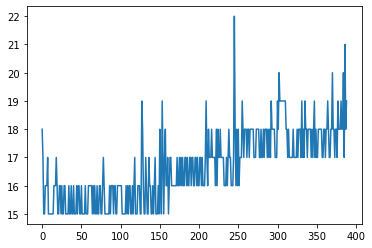

In [1665]:
col = 'age'

print(f'Число уникальных возрастов:', stud[col].nunique())
plt.plot(stud[col])

Интервальный столбец. Разброс в 8 лет: от 15 лет до 22 лет. Пропусков нет. Видна тенденция роста возраста с продвижением по строкам. Предположение: данные сортированы по классам: от младших к старшим? Похоже на выброс одно значение: 22 года.

Посмотрим на распределение признака:

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

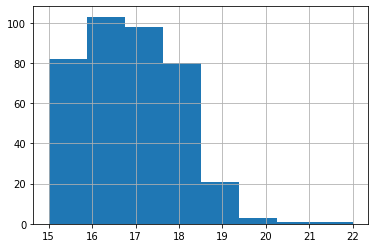

In [1666]:
col = 'age'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

Проверим столбец на выбросы:

<AxesSubplot:>

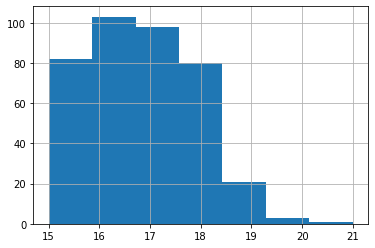

In [1667]:
col = 'age'

descr = stud[col].describe() # Series с дескриптивной статистикой по колонке
IQR = descr['75%'] - descr['25%'] # Межквартильный размах
left = descr['25%'] - 1.5 * IQR # Левая граница
right = descr['75%'] + 1.5 * IQR # правая граница

# количество bins для гистограммы, равное количеству уникальных значений
bins_ = stud[col].loc[stud[col].between(left, right)].nunique()
stud[col].loc[stud[col].between(left, right)].hist(bins = bins_)

Значение 22 год подходит под выброс. Удаляем строку с ним и проверяем, что строка со значением 22 удалена:

In [1668]:
stud = stud.loc[stud[col].between(left, right)]
display(pd.DataFrame(stud[col].value_counts()))

,age
16,103
17,98
15,82
18,80
19,21
20,3
21,1


### address

In [1669]:
col = 'address'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  373 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,address
U,290
R,83


Бинарный ранговый признак. Заполним пропуски случайным образом, но пропорционально значению признака, для этого напишем функцию fill_rand_binar(), которую будем применять для каждого бинарного столбца.

In [1670]:
# Функция для заполнения пропусков в бинарных признаках
# Заполнение случайнцм образом, но в пропорции признаков
def fill_rand_binar(df_, col_=[]):
    
    #работаем с копией датафрейма
    df = df_.copy()
    
    # Количество пропусков
    size = df[col_].isna().sum()
    
    # Если пропусков нет, выходим
    if size == 0:
        print(f'Пропусков в столбце', col_,'нет')
        return df
    
    # Отношение количества бинарных значений
    frac = pd.DataFrame(df[col_].value_counts()).iloc[1][0] / pd.DataFrame(df[col_].value_counts()).iloc[0][0]
    
    # Заполняем массив единицами и нулями в примерно этом же отношении
    sample = np.random.binomial(1, frac, size)
    
    # Вытаскиваем индексы строк с пропусками
    ind = list(df[col_][df[col_].isna()].index)
      
    val1 = pd.DataFrame(df[col_].value_counts()).index[1]
    val0 = pd.DataFrame(df[col_].value_counts()).index[0]
    
    count = 0
    # Заполняем в цикле значения строк, значения берём из двух строковых вариантов, доступных в столбце
    for i in ind:
        if sample[count]:
            df.loc[i, col_] = val1
        else:
            df.loc[i, col_] = val0
        count += 1
        
    print(f'Заполнили', size, 'пропусков в столбце', col_)
    return df

In [1671]:
col = 'address'

stud = fill_rand_binar(stud, col)

Заполнили 15 пропусков в столбце address


In [1672]:
print(f'Пропусков в столбце', col, ':', stud[col].isnull().sum())

Пропусков в столбце address : 0


Посмотрим на распределение признака:

<AxesSubplot:>

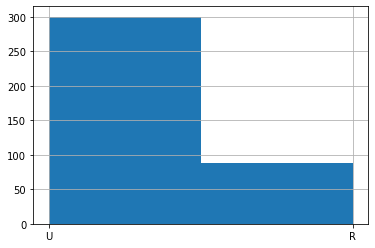

In [1673]:
col = 'address'

stud[col].hist(bins=stud[col].nunique())

Большая часть учеников живёт в городе

Зависимость признака от индекса:

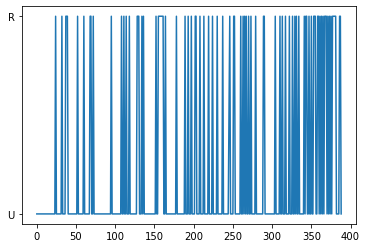

In [1674]:
col = 'address'

plt.plot(stud[col])

Связи не обнаруживается.

### famsize

Бинарный (ранговый) признак, посмотрим на общую информацию и количество пропусков.

In [1675]:
col = 'famsize'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  361 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,famsize
GT3,254
LE3,107


Пропусков в столбце famsize :  27


Заполним пропуски случайным образом, но пропорционально значению признака, как в случае столбца address

In [1676]:
stud = fill_rand_binar(stud, col)

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

Заполнили 27 пропусков в столбце famsize
<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,famsize
GT3,272
LE3,116


Пропусков в столбце famsize :  0


Посмотрим на распределение признака:

<AxesSubplot:>

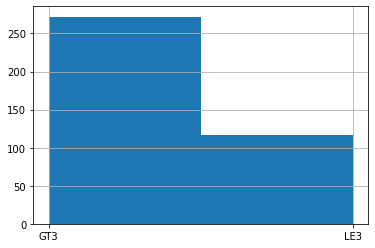

In [1677]:
col = 'famsize'

stud[col].hist(bins=stud[col].nunique())

Большая часть учеников живёт в больших семьях (>3 человека)

Зависимость признака от индекса:

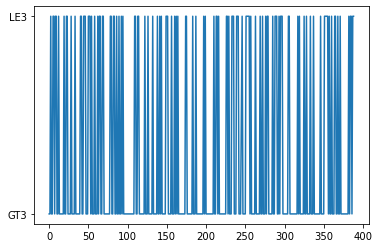

In [1678]:
col = 'famsize'

plt.plot(stud[col])

Связи не обнаруживается.

### pstatus

Бинарный ранговый признак, посмотрим на общую информацию и количество пропусков.

In [1679]:
col = 'pstatus'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  343 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,pstatus
T,307
A,36


Пропусков в столбце pstatus :  45


Заполним пропуски случайным образом, но пропорционально значению признака, как в случае столбцов address, famsize

In [1680]:
stud = fill_rand_binar(stud, col)

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

Заполнили 45 пропусков в столбце pstatus
<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,pstatus
T,345
A,43


Пропусков в столбце pstatus :  0


Посмотрим на распределение признака:

<AxesSubplot:>

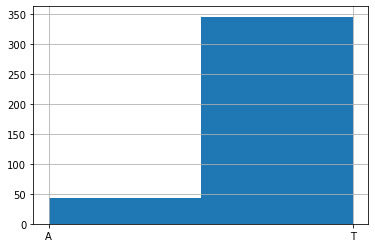

In [1681]:
col = 'pstatus'

stud[col].hist(bins=stud[col].nunique())

Зависимость признака от индекса:

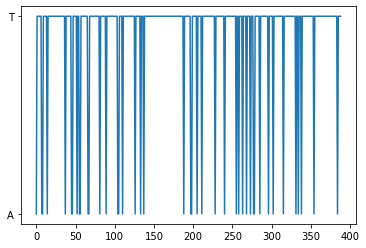

In [1682]:
col = 'pstatus'

plt.plot(stud[col])

Связи не обнаруживается.

### medu

Ранговый (порядковый) признак, посмотрим на общую информацию и на количество пропусков.

In [1683]:
col = 'medu'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))
nones = stud.isnull()[col].sum()

print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    385 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,medu
4.0,131
2.0,100
3.0,95
1.0,56
0.0,3


Пропусков в столбце medu :  3


Заполним пропуски случайным образом, но в пропорции признаков, для этого напишем функцию, выполняющее почти то же, что и fill_rand_binar(), но для любого количества значений признака.

In [1686]:
# Функция для заполнения пропусков в ранговых и номинативных признаках
# Заполнение случайным образом, но с сохранением пропорции признаков

def fill_rand_multirange(df_, col_=[]):
    
    df = df_.copy()
    
    # Количество значений
    size = df[col_].shape[0]
        
    # Количество пропусков
    size_nones = df[col_].isna().sum()

    # Возможные значения признака
    values = df[col_].unique()
    values = [x for x in values if str(x) != 'nan']
    
    # Если пропусков нет, выходим
    if size_nones == 0:
        print(f'Пропусков в столбце', col_,'нет')
        return df
      
    # Заполняем список с отношениями количества уникальных значений строк к общему количеству строк
    ratios = []
    for val in values:
        ratios.append(df[col_][df[col_] == val].shape[0] / size)
    
    # Вытаскиваем индексы строк с пропусками
    index_nones = list(df[col_][df[col_].isna()].index)
    
    # Перемешиваем список индексов с пропусками
    index_nones_shuffled = random.sample(index_nones, len(index_nones))
    
    # Присваиваем в цикле пустым значениям отдельные уникальные значения
    index = 0
    start_index = 0
    
    # Цикл по уникальным значениям
    for val in values:        
        size_value = math.ceil(size_nones * ratios[index])
        end_index = start_index + size_value
        # Цикл по перемешанным индексам пустых значений, работаем со срезами
        for ind in index_nones_shuffled[start_index:end_index]:
            df.loc[ind, col_] = val
        start_index += size_value
        index += 1
        
    # Если остался nan (из-за ошибки округления), то присвоим такой строке значение моды
    if df[col_].isna().sum() != 0:
        df[col_] = df[col_].fillna(df[col_].mode()[0])
        
    print(f'Заполнили', size_nones, 'пропусков в столбце', col_)
    return df

In [1687]:
stud = fill_rand_multirange(stud, col)

Заполнили 3 пропусков в столбце medu


In [1688]:
nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,':', nones)

Пропусков в столбце medu : 0


Посмотрим на распределение признаков и на описательную статистику:

count    388.000000
mean       2.768041
std        1.098653
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

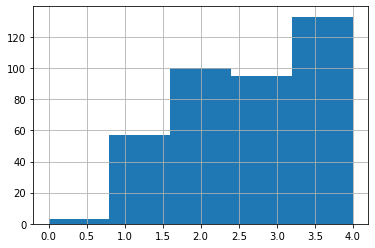

In [1689]:
col = 'medu'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

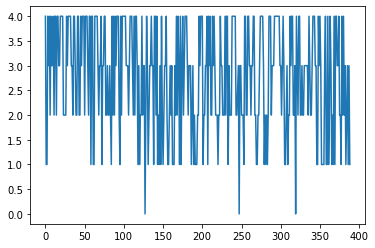

In [1690]:
col = 'medu'
plt.plot(stud[col])

Связи не обнаруживается.

### fedu

Ранговый (порядковый) признак, посмотрим на общую информацию и количество пропусков.

In [1691]:
col = 'fedu'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    364 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,fedu
2.0,105
3.0,94
4.0,88
1.0,74
0.0,2
40.0,1


Пропусков в столбце fedu :  24


Имеется аномалия: значение "40.0" - явная ошибка сбора данных. Примем, что ошиблись в одном знаке и это должно было быть "4.0":

In [1692]:
col = 'fedu'

stud[col] = stud[col].replace([40.0], 4.0)
display(pd.DataFrame(stud[col].value_counts()))

,fedu
2.0,105
3.0,94
4.0,89
1.0,74
0.0,2


Заполним пропуски случайным образом, но в пропорции признаков, как в случае столбца medu

In [1693]:
col = 'fedu'

stud = fill_rand_multirange(stud, col)

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,':', nones)

Заполнили 24 пропусков в столбце fedu
Пропусков в столбце fedu : 0


In [1694]:
stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    388 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,fedu
2.0,112
3.0,100
4.0,95
1.0,79
0.0,2


Посмотрим на распределение признаков и на описательную статистику:

count    388.000000
mean       2.533505
std        1.086164
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

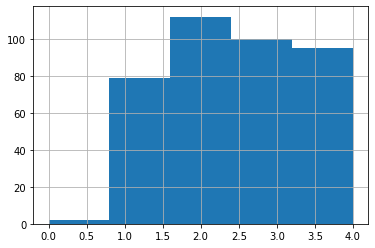

In [1695]:
col = 'fedu'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

Связи не обнаруживается.

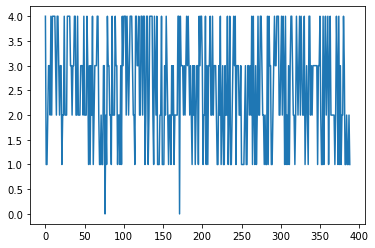

In [1696]:
col = 'fedu'
plt.plot(stud[col])

### mjob

Категориальный признак, посмотрим на общую информацию и количество пропусков.

In [1697]:
col = 'mjob'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    369 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,mjob
other,127
services,97
at_home,58
teacher,55
health,32


Пропусков в столбце mjob :  19


Заполняем пропуски случайным образом, но в пропорции признаков, как в случае столбцов medu, fedu

In [1698]:
col = 'mjob'

stud = fill_rand_multirange(stud, col)

Заполнили 19 пропусков в столбце mjob


In [1699]:
stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,mjob
other,134
services,102
at_home,61
teacher,57
health,34


In [1700]:
col = 'mjob'

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

Пропусков в столбце mjob :  0


Отношение признаков, визуализированно:

count       388
unique        5
top       other
freq        134
Name: mjob, dtype: object

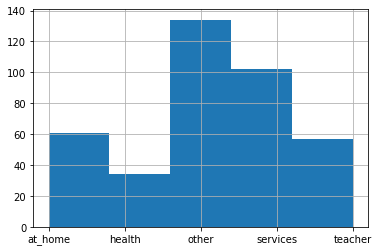

In [1701]:
col = 'mjob'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

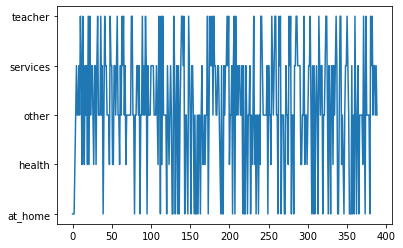

In [1702]:
plt.plot(stud[col])

### fjob

Категориальный признак, посмотрим на общую информацию и количество пропусков.

In [1703]:
col = 'fjob'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    352 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,fjob
other,194
services,98
teacher,29
at_home,16
health,15


Пропусков в столбце fjob :  36


Та же самая история с fjob: пропуски заполним случайным образом, но в пропорции признаков, как в случае столбца medu, fedu, mjob:

In [1704]:
col = 'fjob'

stud = fill_rand_multirange(stud, col)

display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

Заполнили 36 пропусков в столбце fjob


,fjob
other,213
services,108
teacher,32
at_home,18
health,17


Пропусков в столбце fjob :  0


Отношение признаков, визуализированно:

count       388
unique        5
top       other
freq        213
Name: fjob, dtype: object

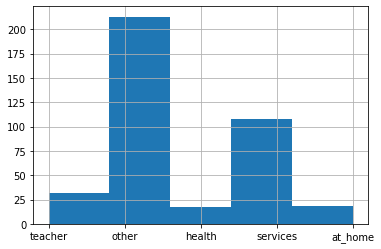

In [1705]:
col = 'fjob'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

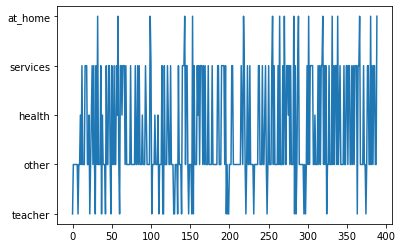

In [1706]:
plt.plot(stud[col])

### reason

Категориальный признак, посмотрим на общую информацию и количество пропусков.

In [1707]:
col = 'reason'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  371 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,reason
course,135
reputation,102
home,101
other,33


Пропусков в колонке reason :  17


Как в случае с medu, fedu, mjob, fjob пропуски заполним случайным образом, но в пропорции признаков:

In [1708]:
col = 'reason'

stud = fill_rand_multirange(stud, col)

display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

Заполнили 17 пропусков в столбце reason


,reason
course,141
home,106
reputation,106
other,35


Пропусков в столбце reason :  0


Посмотрим на распределение признаков:

<AxesSubplot:>

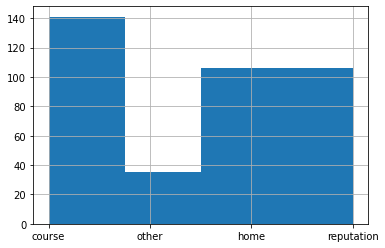

In [1709]:
col = 'reason'

stud[col].hist(bins=stud[col].nunique())

Причины выбора: лидирует: курс, равны: репутация и близость к дому. Непонятно пока, что этот признак может дать. Возможно, ничего.

Зависимость признака от индекса:

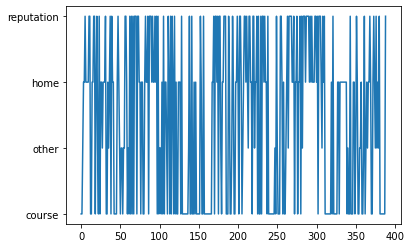

In [1711]:
plt.plot(stud[col])

Ничего не видно, за что бы мог зацепиться глаз.

### guardian

Категориальный признак, посмотрим на общую информацию и количество пропусков.

In [1713]:
col = 'guardian'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  357 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,guardian
mother,247
father,86
other,24


Пропусков в колонке guardian :  31


Как в случае с medu, fedu, mjob, fjob, reason пропуски заполним случайным образом, но в пропорции признаков:

In [1714]:
col = 'guardian'

stud = fill_rand_multirange(stud, col)

display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

Заполнили 31 пропусков в столбце guardian


,guardian
mother,269
father,93
other,26


Пропусков в колонке guardian :  0


Зависимость признака от индекса:

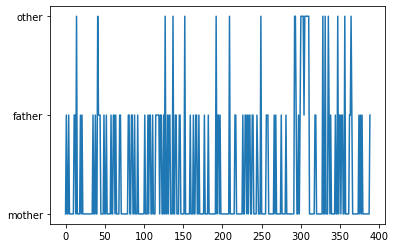

In [1715]:
col = 'guardian'
plt.plot(stud[col])

Ничего необычного не видно.

### traveltime

Ранговый признак.

In [1716]:
col = 'traveltime'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  360 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,traveltime
1.0,238
2.0,94
3.0,21
4.0,7


Пропусков в колонке traveltime :  28


Как в случае с medu, fedu, mjob, fjob, reason, guardian пропуски заполним случайным образом, но в пропорции признаков:

In [1717]:
col = 'traveltime'

stud = fill_rand_multirange(stud, col)

display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

Заполнили 28 пропусков в столбце traveltime


,traveltime
1.0,256
2.0,101
3.0,23
4.0,8


Пропусков в столбце traveltime :  0


Посмотрим на распределение признаков и на описательную статистику:

count    388.000000
mean       1.440722
std        0.700012
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

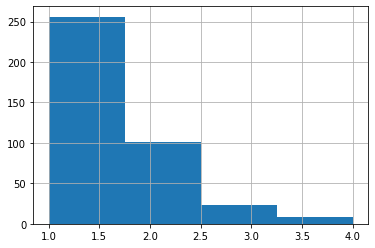

In [1718]:
col = 'traveltime'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

Большинство учеников добирается до школы за время до получаса. Распределение не обнаруживает визуальных аномалий.

Зависимость признака от индекса:

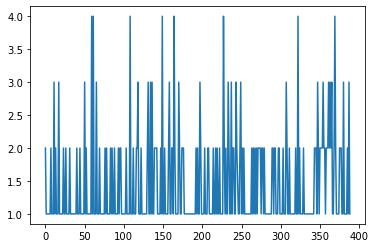

In [1719]:
plt.plot(stud[col])

Ничего необычного не наблюдается.

### studytime

Порядковый, ранговый признак. Посмотрим на свойства:

In [1720]:
col = 'studytime'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

print(f'Уникальных значений в столбце', col, ':', stud[col].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  381 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,studytime
2.0,189
1.0,102
3.0,63
4.0,27


Пропусков в столбце studytime :  7
Уникальных значений в столбце studytime : 4


То же значение, что и в стобце studytime_granular. Посмотрим, как коррелируют studytime и studytime_granular:

,studytime,studytime_granular
studytime,1.0,-1.0
studytime_granular,-1.0,1.0


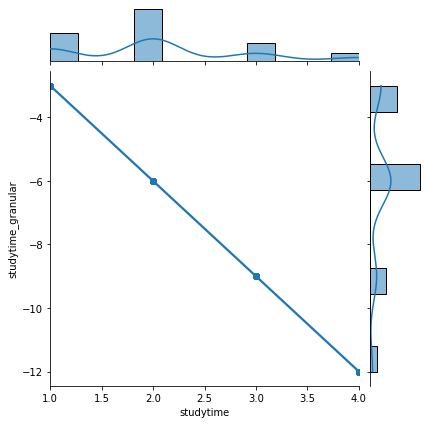

In [1721]:
sns.jointplot(x = 'studytime', y = 'studytime_granular', data = stud, kind = 'reg')
stud[['studytime', 'studytime_granular'] ].corr()

Полная обратная корреляция. Поэтому удаляем колонку studytime_granular:

In [1722]:
stud.drop(['studytime_granular'], inplace = True, axis = 1)

Пропуски снова заполним случайным образом, но в пропорции признаков:

In [1723]:
col = 'studytime'

stud = fill_rand_multirange(stud, col)

Заполнили 7 пропусков в столбце studytime


Посмотрим на распределение признаков и на описательную статистику (ещё раз в добавок к jointplot'у):

count    388.000000
mean       2.041237
std        0.843489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

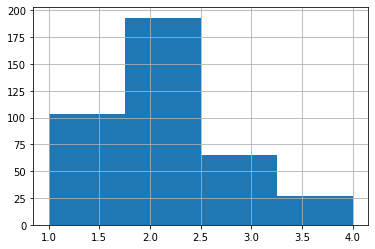

In [1724]:
col = 'studytime'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

Большая часть учеников уделяет допольнительным занятиям до 5 часов (в неделю?).

Зависимость признака от индекса:

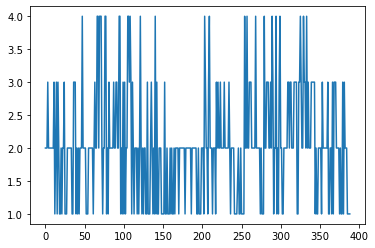

In [1725]:
col = 'studytime'

plt.plot(stud[col])

Здесь ничего интересного не видно.

### failures

Порядковый, ранговый признак. Посмотрим на свойства:

In [1726]:
col = 'failures'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  366 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,failures
0.0,290
1.0,48
2.0,15
3.0,13


Пропусков в столбце failures :  22


Пропуски снова заполним случайным образом, но в пропорции признаков:

In [1727]:
col = 'failures'

stud = fill_rand_multirange(stud, col)

Заполнили 22 пропусков в столбце failures


Посмотрим на распределение признаков и на описательную статистику:

count    388.000000
mean       0.322165
std        0.720195
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

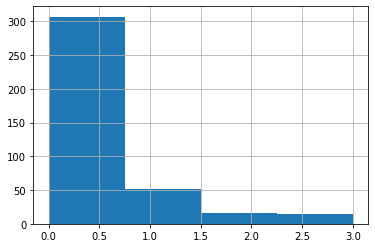

In [1728]:
col = 'failures'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

У большей части учеников внешкольных неудач не было. Выбросы не имеет смысла смотреть: максимальное значение 3 (неудачи) имеет право на существование. Распределение признака же само по себе правдоподобное.

Зависимость признака от индекса:

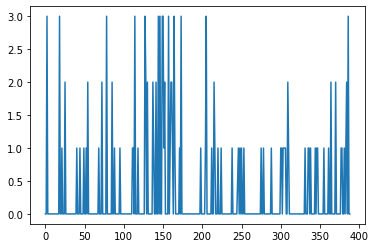

In [1729]:
col = 'failures'

plt.plot(stud[col])

Ничего странного не видно.

### schoolsup

Бинарный ранговый признак

In [1730]:
col = 'schoolsup'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  379 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,schoolsup
no,330
yes,49


Пропусков в столбце schoolsup :  9


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1731]:
col = 'schoolsup'

stud = fill_rand_binar(stud, col)

Заполнили 9 пропусков в столбце schoolsup


Посмотрим на распределение признака:

<AxesSubplot:>

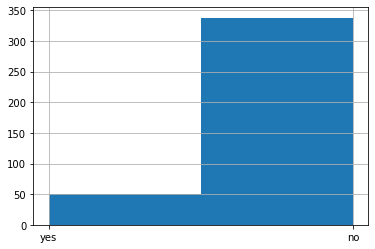

In [1732]:
col = 'schoolsup'

stud[col].hist(bins=stud[col].nunique())

У большей части учеников дополнительной поддержки нет.

Зависимость признака от индекса:

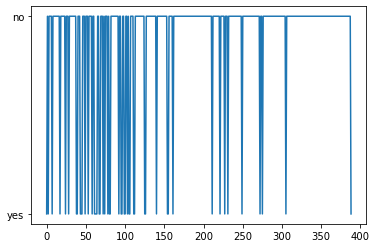

In [1733]:
col = 'schoolsup'

plt.plot(stud[col])

Кажется, что ученики ближе к началу датасета получают чаще дополнительную поддержку.

### famsup

Бинарный ранговый признак

In [1734]:
col = 'famsup'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  350 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,famsup
yes,216
no,134


Пропусков в колонке famsup :  38


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1735]:
col = 'famsup'

stud = fill_rand_binar(stud, col)

Заполнили 38 пропусков в столбце famsup


Посмотрим на распределение признака:

<AxesSubplot:>

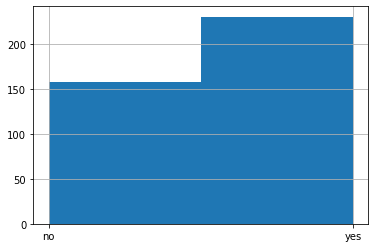

In [1736]:
col = 'famsup'

stud[col].hist(bins=stud[col].nunique())

Чуть больше учеников получают семейную поддерку, нежели не получают.

Зависимость признака от индекса:

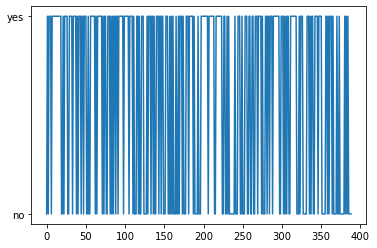

In [1737]:
col = 'famsup'

plt.plot(stud[col])

Визуально никакой связи.

### paid

Бинарный ранговый признак

In [1738]:
col = 'paid'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    349 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,paid
no,196
yes,153


Пропусков в столбце paid :  39


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1739]:
col = 'paid'

stud = fill_rand_binar(stud, col)

Заполнили 39 пропусков в столбце paid


Посмотрим на распределение признака:

<AxesSubplot:>

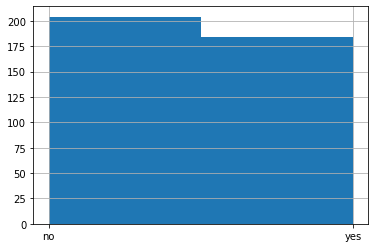

In [1740]:
col = 'paid'

stud[col].hist(bins=stud[col].nunique())

Чуть больше половины учеников не посещают репетитора по математике.

Зависимость признака от индекса:

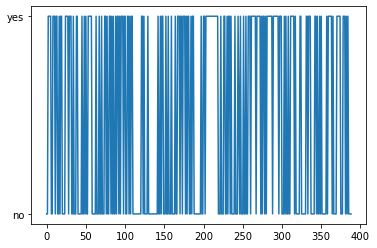

In [1741]:
col = 'paid'

plt.plot(stud[col])

Визуально никакой связи.

### activities

Бинарный ранговый признак

In [1742]:
col = 'activities'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в столбце', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  374 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,activities
yes,192
no,182


Пропусков в столбце activities :  14


In [1743]:
col = 'activities'

stud = fill_rand_binar(stud, col)

Заполнили 14 пропусков в столбце activities


Посмотрим на распределение признака:

<AxesSubplot:>

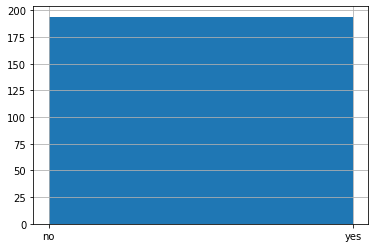

In [1744]:
col = 'activities'

stud[col].hist(bins=stud[col].nunique())

Примерно поровну учеников посещают факультативные занятия.

Зависимость признака от индекса:

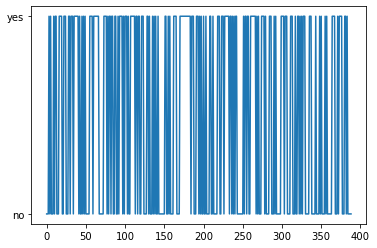

In [1745]:
col = 'activities'

plt.plot(stud[col])

Визуально никакой связи.

### nursery

Бинарный ранговый признак

In [1746]:
col = 'nursery'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  373 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,nursery
yes,297
no,76


Пропусков в колонке nursery :  15


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1747]:
col = 'nursery'

stud = fill_rand_binar(stud, col)

Заполнили 15 пропусков в столбце nursery


Посмотрим на распределение признака:

<AxesSubplot:>

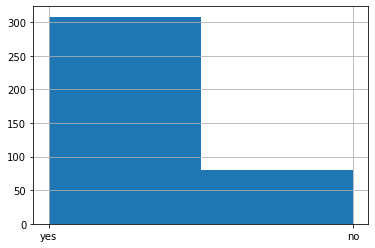

In [1748]:
col = 'nursery'

stud[col].hist(bins=stud[col].nunique())

Около одной пятой учеников не посещали детский сад.

Зависимость признака от индекса:

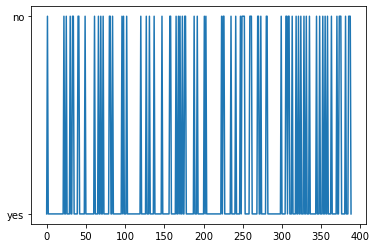

In [1749]:
col = 'nursery'

plt.plot(stud[col])

Визуально никакой связи.

### higher

Бинарный ранговый признак.

In [1750]:
col = 'higher'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  368 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,higher
yes,350
no,18


Пропусков в колонке higher :  20


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1751]:
col = 'higher'

stud = fill_rand_binar(stud, col)

Заполнили 20 пропусков в столбце higher


Посмотрим на распределение признака:

<AxesSubplot:>

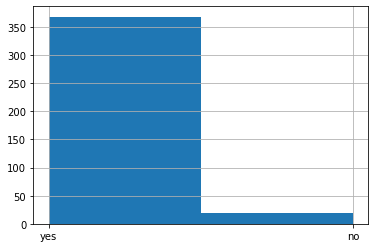

In [1752]:
col = 'higher'

stud[col].hist(bins=stud[col].nunique())

Почти все ученики хотят получить высшее образование.

Зависимость признака от индекса:

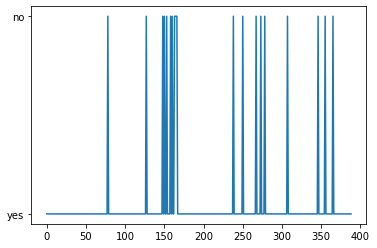

In [1753]:
col = 'higher'

plt.plot(stud[col])

Визуально никакой связи.

### internet

Бинарный ранговый признак.

In [1754]:
col = 'internet'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  354 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,internet
yes,299
no,55


Пропусков в колонке internet :  34


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1755]:
col = 'internet'

stud = fill_rand_binar(stud, col)

Заполнили 34 пропусков в столбце internet


Посмотрим на распределение признака:

<AxesSubplot:>

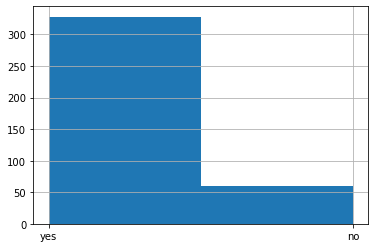

In [1756]:
col = 'internet'

stud[col].hist(bins=stud[col].nunique())

Около одной пятой учеников не имеют доступа в интернет.

Зависимость признака от индекса:

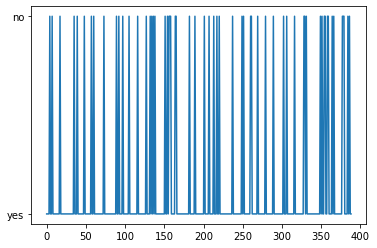

In [1757]:
col = 'internet'

plt.plot(stud[col])

Визуально никакой связи.

### romantic

Бинарный ранговый признак.

In [1758]:
col = 'romantic'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  357 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


,romantic
no,235
yes,122


Пропусков в колонке romantic :  31


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1759]:
col = 'romantic'

stud = fill_rand_binar(stud, col)

Заполнили 31 пропусков в столбце romantic


Посмотрим на распределение признака:

<AxesSubplot:>

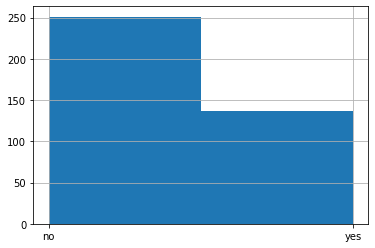

In [1760]:
col = 'romantic'

stud[col].hist(bins=stud[col].nunique())

Около одной пятой учеников не имеют доступа в интернет.

Зависимость признака от индекса:

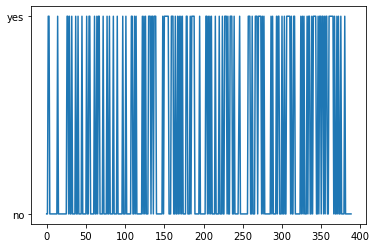

In [1761]:
col = 'romantic'

plt.plot(stud[col])

Визуально никакой связи.

### famrel

Порядковый ранговый признак.

In [1762]:
col = 'famrel'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  361 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,famrel
4.0,178
5.0,96
3.0,62
2.0,17
1.0,7
-1.0,1


Пропусков в колонке famrel :  27


Значение "-1.0" - явная ошибка сбора данных. Поменяем значение на "1.0", приняв, что ошибка в знаке.

In [1763]:
stud[col] = stud[col].replace([-1], 1.0)
display(pd.DataFrame(stud[col].value_counts()))

,famrel
4.0,178
5.0,96
3.0,62
2.0,17
1.0,8


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1764]:
col = 'famrel'

stud = fill_rand_multirange(stud, col)

Заполнили 27 пропусков в столбце famrel


count    388.000000
mean       3.930412
std        0.910917
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

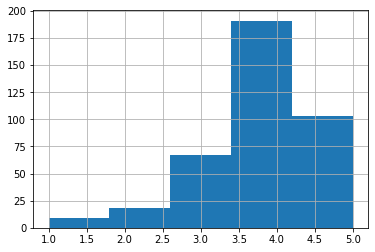

In [1765]:
col = 'famrel'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

Аномалий нет. Хвост сильно сдвинут влево, а пик - направо: у большинства отношения в семье неплохие.

Зависимость признака от индекса:

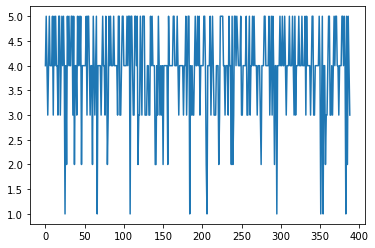

In [1766]:
col = 'famrel'

plt.plot(stud[col])

Связи с номером индекса не видно.

### freetime

Порядковый ранговый признак.

In [1767]:
col = 'freetime'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  379 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,freetime
3.0,152
4.0,109
2.0,63
5.0,37
1.0,18


Пропусков в колонке freetime :  9


Можно, конечно, пропускам присвоить значение моды. Но мы сделаем, как уже много раз делали:заполним пропуски случайным образом, но пропорционально значению признака.

In [1768]:
col = 'freetime'

stud = fill_rand_multirange(stud, col)

Заполнили 9 пропусков в столбце freetime


Посмотрим на распределение признаков и на описательную статистику:

count    388.000000
mean       3.219072
std        0.988799
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

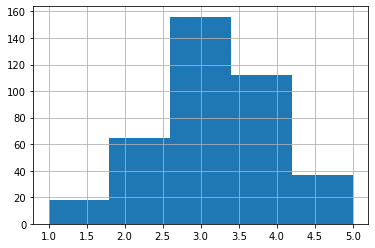

In [1769]:
col = 'freetime'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

Аномалий нет.

Зависимость признака от индекса:

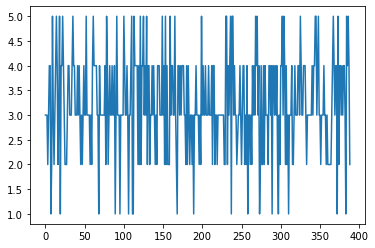

In [1770]:
col = 'freetime'

plt.plot(stud[col])

Связи с номером индекса нет.

### goout

Порядковый ранговый признак.

In [1771]:
col = 'goout'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   381 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,goout
3.0,126
2.0,101
4.0,81
5.0,50
1.0,23


Пропусков в колонке goout :  7


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1772]:
col = 'goout'

stud = fill_rand_multirange(stud, col)

Заполнили 7 пропусков в столбце goout


Посмотрим на распределение признаков и на описательную статистику:

count    388.000000
mean       3.087629
std        1.107900
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

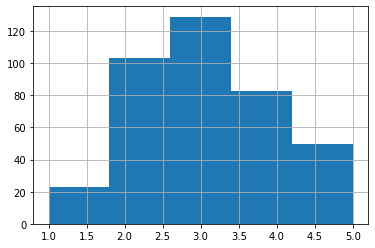

In [1773]:
col = 'goout'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

Аномалий нет.

Зависимость признака от индекса:

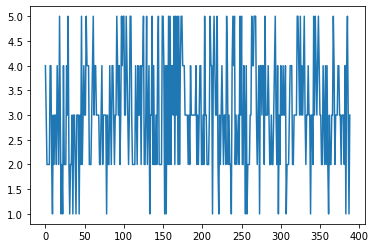

In [1774]:
col = 'goout'

plt.plot(stud[col])

Ничего необычного не видно.

### health

Порядковый ранговый признак.

In [1775]:
col = 'health'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  373 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,health
5.0,137
3.0,88
4.0,60
1.0,46
2.0,42


Пропусков в колонке health :  15


Заполним пропуски случайным образом, но пропорционально значению признака:

In [1776]:
col = 'health'

stud = fill_rand_multirange(stud, col)

Заполнили 15 пропусков в столбце health


Посмотрим на распределение признаков и на описательную статистику:

count    388.000000
mean       3.533505
std        1.400041
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

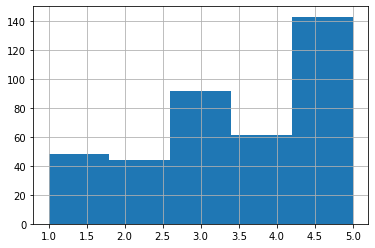

In [1777]:
col = 'health'

stud[col].hist(bins=stud[col].nunique())
stud[col].describe()

Довольно странное распределение. Похоже на то, что состояние здоровья опрашивалось у самих учеников, а они могли дать лишь субъективный ответ.

Зависимость признака от индекса:

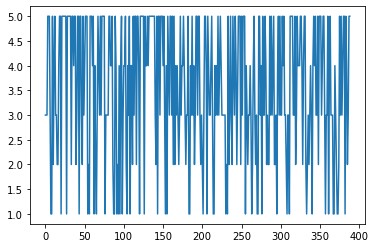

In [1778]:
col = 'health'

plt.plot(stud[col])

Ничего необычного не видно.

### absences

Количественный признак.

In [1779]:
col = 'absences'

stud.loc[:, [col]].info()
display(pd.DataFrame(stud[col].value_counts()))

nones = stud.isnull()[col].sum()
print(f'Пропусков в колонке', col,': ', nones)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 388
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  377 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


Пропусков в колонке absences :  11


Скопируем DataFrame на всякий случай:

In [1780]:
stud_copy1 = stud.copy()

Заполним пропуски медианой:

In [1781]:
col = 'absences'

print(f'Медиана столбца', col, ':', stud_copy1[col].median())

stud_copy1[col] = stud_copy1[col].fillna(stud_copy1[col].median())

Медиана столбца absences : 4.0


Посмотрим на распределение признаков и на описательную статистику:

count    388.000000
mean       7.203608
std       23.310671
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

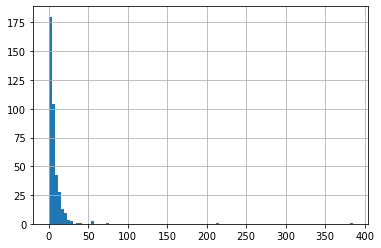

In [1782]:
stud_copy1[col].hist(bins=100)
stud_copy1[col].describe()

Большие выбросы (из-за тех, кто очень много пропускал занятий). Посмотрим что будет, если отфильтровать выбросы в оригинальном датасете по формуле межквартильного размаха.

,absences
0.0,110
4.0,63
2.0,60
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


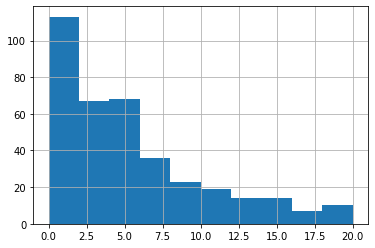

In [1783]:
col = 'absences'

descr = stud_copy1[col].describe()
IQR = descr['75%'] - descr['25%']

#левую границу берём за 0
left = 0
right = descr['75%'] + 1.5 * IQR

stud_copy1[col].loc[stud_copy1[col].between(left, right)].hist(bins=10)
stud_copy1 = stud_copy1.loc[stud_copy1[col].between(left, right)]
display(pd.DataFrame(stud_copy1[col].value_counts()))

Теоретически, лишь красоты ради можно было бы все float64 столбцы в данном датасете преобразовать в int64, т.к. дробных чисел в нём не встречается. Но за неимением времени оставим эту затею.

Теперь посмотрим на распределение, приняв за ширину bins число уникальных значений столбца:

count    371.000000
mean       4.560647
std        4.886657
min        0.000000
25%        0.000000
50%        4.000000
75%        6.500000
max       20.000000
Name: absences, dtype: float64

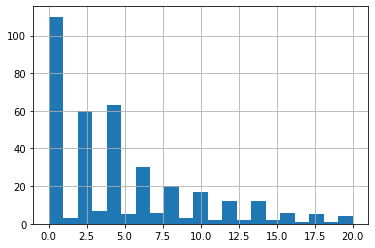

In [1784]:
col = 'absences'

stud_copy1[col].hist(bins=stud_copy1[col].nunique())
stud_copy1[col].describe()

Имеются две аномалии: во-первых, по сравнению с нечётным количеством пропущенных занятий, чётное соседнее количество на порядок выше - занятия идут по парам? Пример: 4 пропущенных занятия встречаются 52 раза, а 5 пропущенных занятий встречаются 5 раз. Более того, распределения чётных и нечётных пропущенных занятий очень похожи (исключая 0). Во-вторых замена на моду (4), похоже, несколько исказила датасет.

Давайте попробуем исправить вышеперечисленны аномалии. Забудем про копию stud_copy1 и напрямую поработаем с оригиналом (stud). Добавим нечётным значениям по единице, превращая их в чётные. Кроме того: чтобы не искажать статистику, удалим значения с пропусками, их всего 11 на свыше 350 записей:

In [1785]:
col = 'absences'

stud.dropna(axis=0,subset=[col],inplace=True)
stud.reset_index(inplace=True, drop=True)

In [1786]:
col = 'absences'

stud[col] = stud[col].apply(lambda x: x+1 if x % 2 != 0 else x)

Отфильтруем выбросы по формуле межквартильного размаха.

,absences
0.0,110
2.0,63
4.0,59
6.0,35
8.0,26
10.0,20
12.0,14
14.0,14
16.0,8
18.0,6


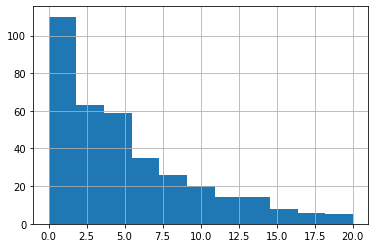

In [1789]:
col = 'absences'

descr = stud[col].describe()
IQR = descr['75%'] - descr['25%']
left = 0
right = descr['75%'] + 1.5 * IQR

bins_ = stud[col].loc[stud[col].between(left, right)].nunique()
stud[col].loc[stud[col].between(left, right)].hist(bins=bins_)
stud = stud.loc[stud[col].between(left, right)]
display(pd.DataFrame(stud[col].value_counts()))

Точно не осталось выбросов?:

<AxesSubplot:xlabel='absences'>

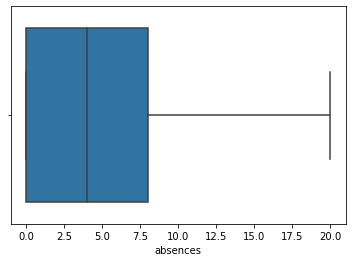

In [1790]:
sns.boxplot(data=stud, x='absences')

Конечно же не осталось.

Посмотрим, сколько пропусков осталось в датасете в каждом из столбцов:

In [1791]:
null_data = stud.isnull().sum()
null_data[null_data>0]

Series([], dtype: int64)

Пропусков теперь нет! И с выбросами более-менее разобрались.

## Корреляционный анализ

Выведем pairplot по всем количественным/ранговым признакам:

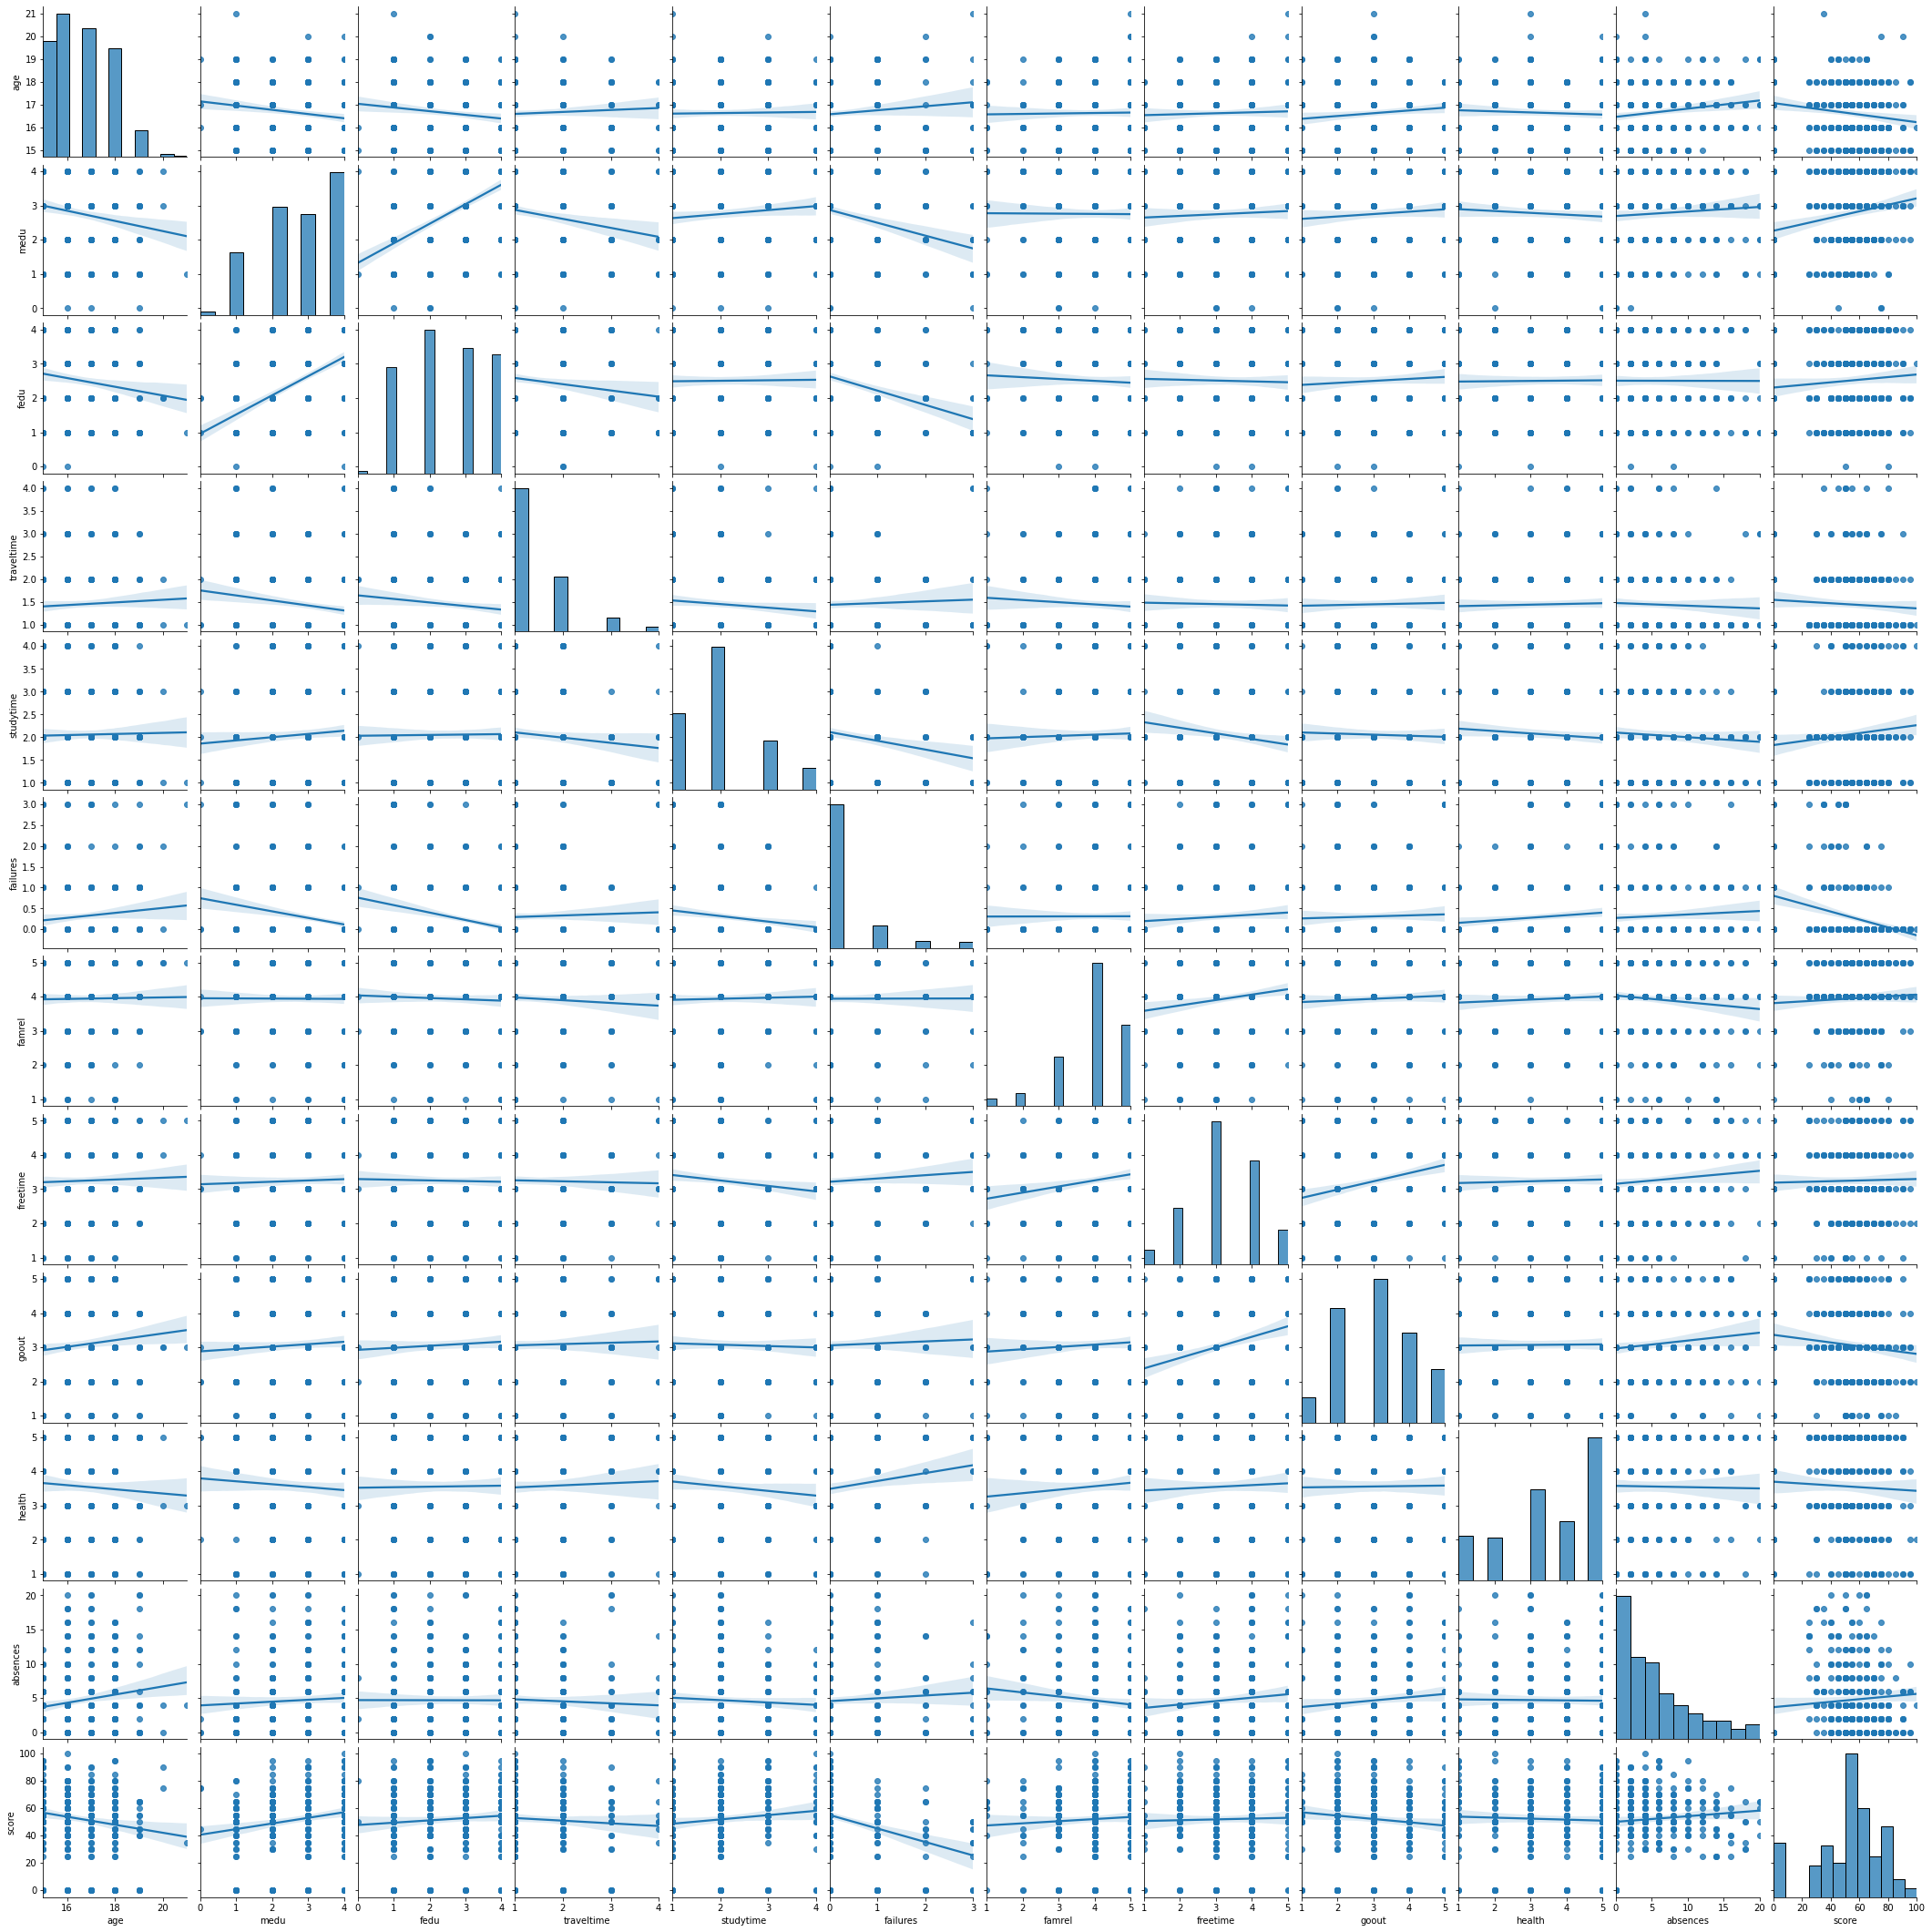

In [1792]:
sns.pairplot(stud, kind = 'reg')

Слишком громоздко, посмотрим лучше на heatmap:

<AxesSubplot:>

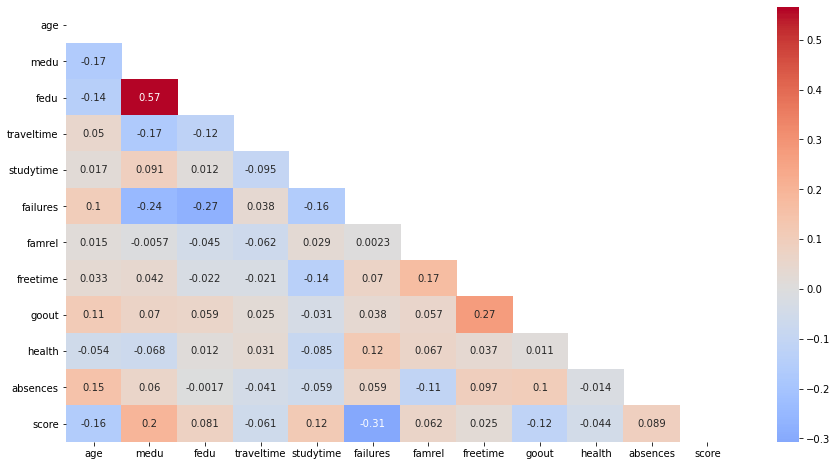

In [1793]:
#подсчитываем коэфф. корреляции
correlation = stud.corr()


plt.figure(figsize = (15,8))

#задаём маску, чтобы визуализировать лишь то, что ниже главной диагонали.
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, mask = mask, annot = True, cmap = 'coolwarm', center = 0)

Положительная корелляция экзаменационной оценки со столбцами (в порядке убывания):

In [1794]:
correlation.score[correlation.score > 0].sort_values(ascending = False).iloc[1:]

medu         0.197699
studytime    0.117494
absences     0.089499
fedu         0.080594
famrel       0.062276
freetime     0.025014
Name: score, dtype: float64

Отрицательная корелляция экзаменационной оценки со столбцами (в порядке убывания):

In [1795]:
correlation.score[correlation.score < 0].sort_values(ascending = True)

failures     -0.306683
age          -0.157187
goout        -0.116704
traveltime   -0.060523
health       -0.044292
Name: score, dtype: float64

Таким образом, в порядке убывания влияние признаков на экзаменационную оценку:

In [1801]:
correlation.score.apply(lambda x: abs(x)).sort_values(ascending = False).iloc[1:]

failures      0.306683
medu          0.197699
age           0.157187
studytime     0.117494
goout         0.116704
absences      0.089499
fedu          0.080594
famrel        0.062276
traveltime    0.060523
health        0.044292
freetime      0.025014
Name: score, dtype: float64

In [ ]:
 'failures', 'medu', 'age', 'goout', 'studytime', 'fedu', 'absences'

Побочные сильные корреляции:
1. Ожидаемо: уровень образования матери коррелирует с уровнем образования отца
2. Из интересного: чем взрослее ученик, тем ниже уровень образования родителей. Указание на общее улучшения уровня образования? Или же менее образованные родители рожают детей раньше?
3. Из интересного: уровни образования матери и отца имеют обратную связь с количеством внеучебных неудач. Более образованные родители более внимательны к детям?
4. Из интересного: больше свободного времени после школы у детей, в семьях которых хорошие отношения.
5. Из интересного: чем моложе ученик, тем меньше пропусков занятий.
6. Ожидаемо: больше внеучебных неудач у более взрослых учеников.
7. Ожидаемо: чем больше ученик проводит в занятиях помимо школы (studytime), тем меньше у него времени на внеучебные неудачи (failures)
7. Ожидаемо: количество проведённого времени с друзьями имеет сильную связь вообще со свободным временем после школы.
8. Ожидаемо: больше свободного времени - это меньше времени на дополнительную учёбу.


**Выводы из корреляционного анализа, сортированы по важности:**
1. **Исключительно сильно (самая сильная корреляция!) влияет на экзаменационную оценку по математике количество внеучебных неудач (failures). Чем меньше неудач, тем выше оценка.**
2. **Очень сильно влияет на оценку уровень образования матери (medu): чем больше уровень, тем выше оценка.**
3. **Чем младше ученик (age), тем, очевидно, он прилежнее, тем выше оценка. Влияние среднее**
4. **Трата дополнительного времени на учёбу помимо школы (studytime) положительно (но средне) влияет на оценку.**
5. **Признак количества проведённого с друзьями времени (goout) средне влияет на оценку**
5. **Уровень образования отца (fedu) значительно слабее влияет на оценку, чем уровень образования матери, но качественно с тем же эффектом.**
6. **Зависимость оценки от количества пропусков занятий (absences) прямая, но также относительно слабая.**
7. Ещё более слабая обратная зависимость оценки от времени в пути до школы (traveltime): чем дольше добираться, тем хуже оценка.
8. Остальными слабыми положительными зависимостями оценки от признаков соответствуют признаки: отношения в семье (famrel) и количество свободного времени после школы (freetime).
9. Слабой отрицательной зависимостью является уровень здоровья (health): более здоровые ученики показывают результат хуже.

# Анализ номинативных переменных

In [1797]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (15, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

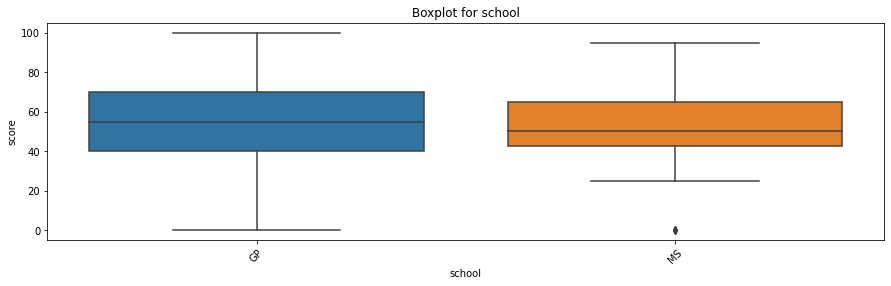

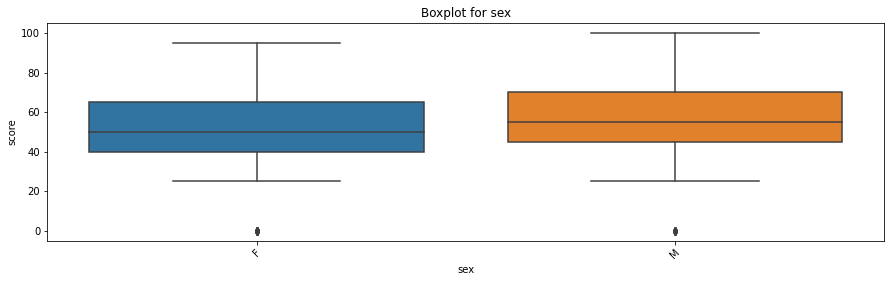

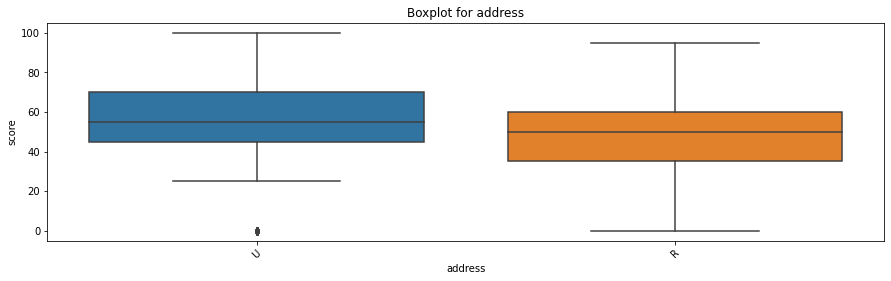

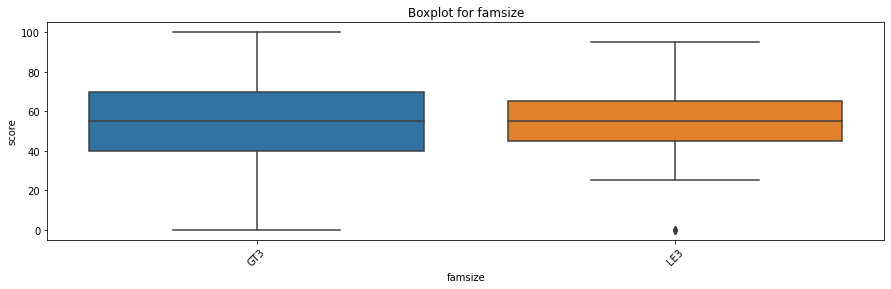

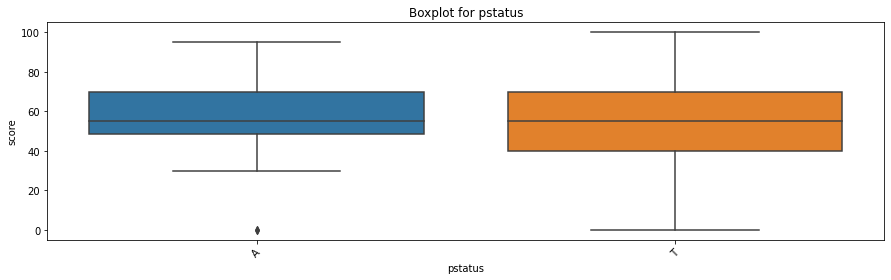

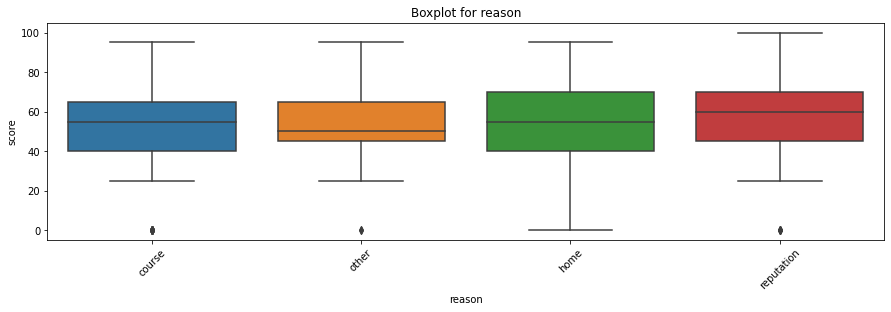

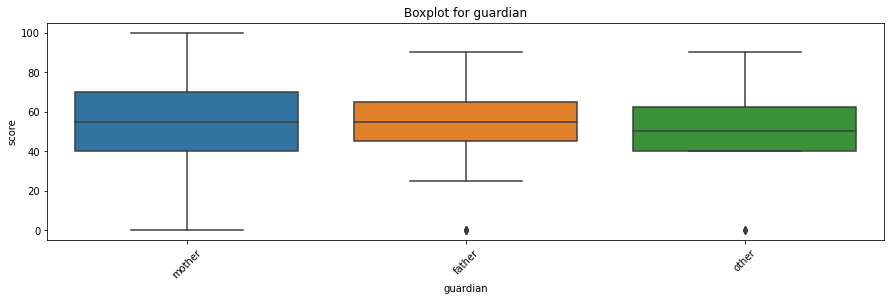

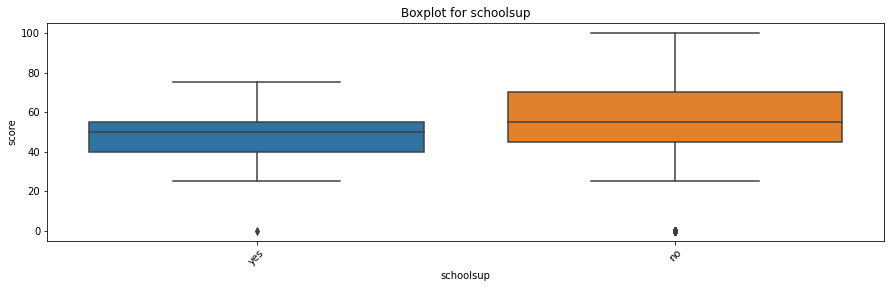

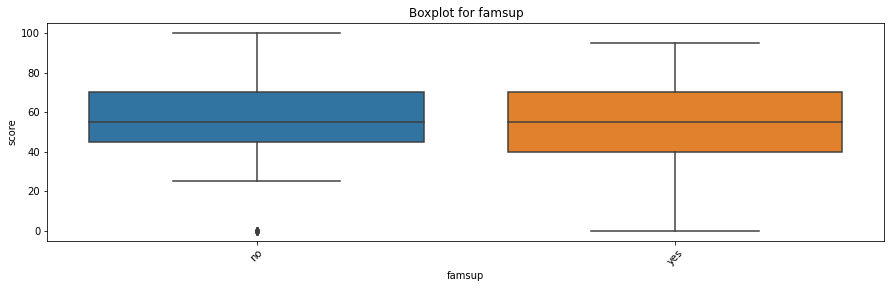

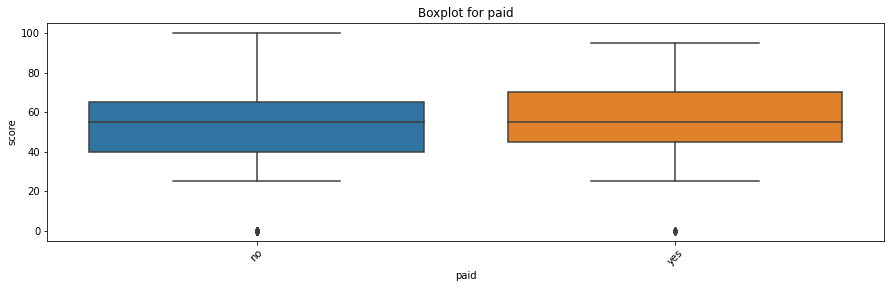

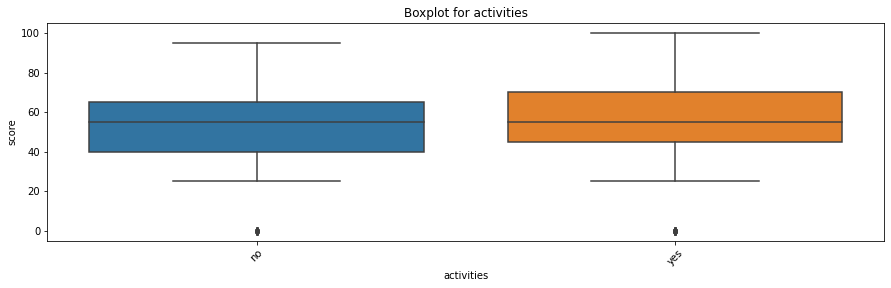

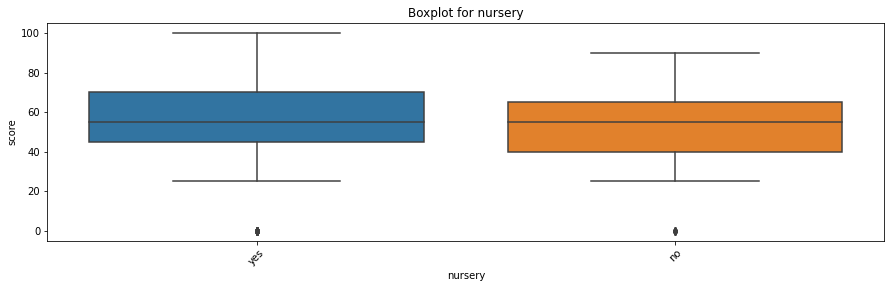

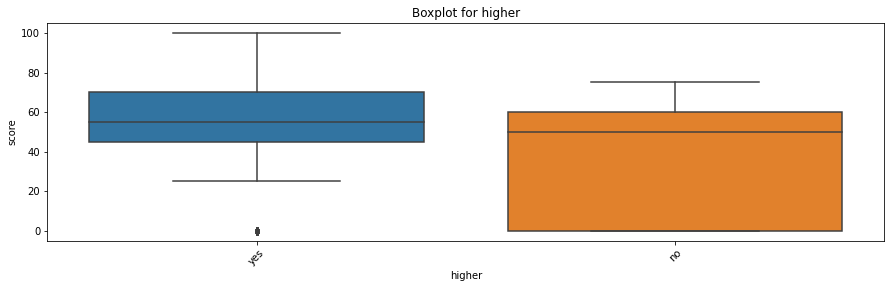

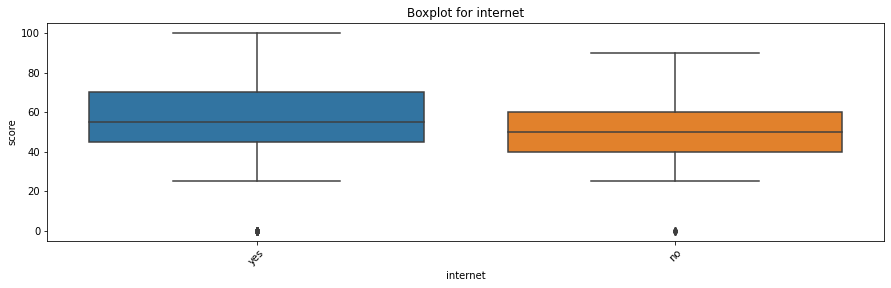

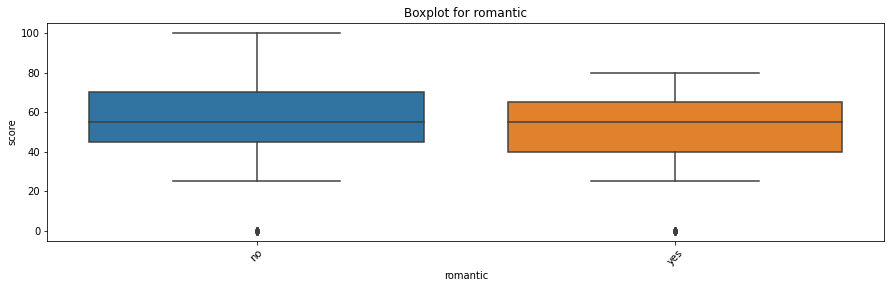

In [1798]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Выберем статистически значимые номинативные/(большинство бинарные) колонки, используя фунцкию, предоставленную в примере к проекту:

In [1799]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1800]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


**Вывод: значимые признаки: sex, address, higher, romantic, paid**

Оставим в датасете значимые колонки, к статистически значимым из анализа номинативных переменных добавим значимые из корреляционного анализа (отсечение от незначимых проведено визуально из pairplot'а по признаку вхождения прямой отсутствия корреляции в границы неопределённости регрессии - так можно? :) ), это будут данные для построения модели:

In [1641]:
stud_for_model = stud.loc[:, ['sex', 'address', 'higher', 'paid', 'romantic', 'failures', 'medu', 'age', 'goout', 'studytime', 'fedu', 'absences', 'traveltime']]
stud_for_model.sample(10)

,sex,address,higher,romantic,failures,medu,age,goout,studytime,fedu,absences,traveltime
203,F,U,yes,no,0.0,2.0,17,3.0,1.0,3.0,4.0,2.0
244,M,U,yes,yes,0.0,3.0,17,4.0,2.0,1.0,2.0,1.0
296,F,U,yes,no,0.0,4.0,17,4.0,3.0,1.0,8.0,1.0
324,M,U,yes,yes,0.0,1.0,18,2.0,1.0,1.0,4.0,2.0
132,F,U,yes,no,0.0,4.0,15,2.0,1.0,4.0,0.0,2.0
99,M,U,yes,no,0.0,3.0,15,4.0,2.0,4.0,0.0,2.0
294,M,U,yes,no,0.0,3.0,17,5.0,1.0,3.0,4.0,1.0
165,F,U,yes,no,0.0,3.0,16,5.0,2.0,3.0,4.0,2.0
67,F,R,yes,no,0.0,3.0,15,2.0,4.0,1.0,12.0,2.0
150,M,R,yes,no,0.0,2.0,16,2.0,1.0,2.0,2.0,3.0


**Вывод по качеству исходных данных: к сожалению, слишком много пропусков, пришлось выправлять, на что ушло очень много времени. Слишком много как оказалось не- или малозначимых колонок - ушло много времени на их обработку. После проведённой работы, кажется, датасет можно будет использовать для первичного построения модели.**